# meetUp ZUP - classificação de musicas eletrônicas

## Coletando dados

### carregando bibliotecas

In [30]:
import librosa
import numpy as np
import IPython.display as ipd
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import librosa.display
from IPython.display import Audio
import datetime
import os
import warnings
warnings.filterwarnings("ignore")

### carregando lista das musicas a serem analisadas

In [23]:
lista_musicas=pd.read_excel('lista_musicas.xlsx')

In [24]:
lista_musicas

,vertente,target,nome_original,link_youtube,nome_wav
0,trap,0,6IX9INE Gotti (WSHH Exclusive - Official Music...,https://www.youtube.com/watch?v=z5WrgDzNIZ0&li...,0_6IX9INE Gotti
1,trap,0,Ayo & Teo - Rolex,https://www.youtube.com/watch?v=lwk5OUII9Vc&li...,0_ayo_teo_rolex
2,trap,0,Desiigner - Tiimmy Turner (Official Audio),https://www.youtube.com/watch?v=ProbPpO_8oo&li...,0_desiigner_timmy
3,trap,0,DRAM - Broccoli,https://www.youtube.com/watch?v=K44j-sb1SRY&li...,0_dram_broccoli
4,trap,0,Kendrick Lamar - HUMBLE,https://www.youtube.com/watch?v=tvTRZJ-4EyI&li...,0_kendrick_humble
5,trap,0,Lil Uzi Vert - XO TOUR Llif3,https://www.youtube.com/watch?v=Zgmvg-zzctI&li...,0_lil_vert_tour
6,trap,0,Post Malone - Psycho,https://www.youtube.com/watch?v=au2n7VVGv_c&li...,0_post_psycho_psycho
7,trap,0,21 Savage - Bank Account,https://www.youtube.com/watch?v=sV2t3tW_JTQ&li...,0_savage_account
8,trap,0,The Weeknd - Reminder,https://www.youtube.com/watch?v=JZjAg6fK-BQ&li...,0_the_weeknd_reminder
9,trap,0,Ty Dolla $ign - Or Nah,https://www.youtube.com/watch?v=TUj0otkJEBo&li...,0_ty_dolla_or_nah


### verificando se todas existem na pastinha

In [4]:
for i in lista_musicas.nome_wav:
    audio_path = str('./musicas/' + i + '.wav')
    print((audio_path)+' ' +str(os.path.exists(audio_path)))

./musicas/0_6IX9INE Gotti.wav True
./musicas/0_ayo_teo_rolex.wav True
./musicas/0_desiigner_timmy.wav True
./musicas/0_dram_broccoli.wav True
./musicas/0_kendrick_humble.wav True
./musicas/0_lil_vert_tour.wav True
./musicas/0_post_psycho_psycho.wav True
./musicas/0_savage_account.wav True
./musicas/0_the_weeknd_reminder.wav True
./musicas/0_ty_dolla_or_nah.wav True
./musicas/1_alok_iro_and_you.wav True
./musicas/1_alok_liu_stonefox_i_want.wav True
./musicas/1_alok_ocean.wav True
./musicas/1_bhaskar_hook.wav True
./musicas/1_cat_dealers_evokings.wav True
./musicas/1_gaba_let_talk.wav True
./musicas/1_nightcall_you_go.wav True
./musicas/1_vintage_hollywood.wav True
./musicas/1_vintage_selva_bear_dont_love.wav True
./musicas/1_kvsh_sorri.wav False
./musicas/2_aura_vortex_rampage.wav True
./musicas/2_belik_avada_kadabra.wav True
./musicas/2_blastoyz_mandala.wav True
./musicas/2_mandragora_aladin.wav True
./musicas/2_menumas_love_story.wav True
./musicas/2_psy_gangnam_style.wav True
./music

### extraindo as features basicas através do librosa

In [31]:
FEATURES=[]

for i in lista_musicas.nome_wav:
    
    audio_path = str('./musicas/' + i + '.wav')

    #carrego a musica
    y, sr = librosa.load(audio_path)

    #capturo a informação já transformada em DB
    db=librosa.amplitude_to_db(librosa.cqt(y), ref = np.max)
    #corto a musica entre 01:30 até 02:30
    db_cut=db[:,3876:6460]

    DB_frame=[]

    for j in range(0,2584):
        DB_count=[]
        for i in range(0,84):
            db_corte= db_cut[i][j]
            if db_corte > -20:
                DB_count.append(db_corte)

        DB_frame.append(len(DB_count))
    qtd_high_db=np.sum(DB_frame)

    tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
    duration=librosa.get_duration(y=y,sr=sr)
    duration_min=datetime.timedelta(seconds=duration)
    duration_sec=datetime.timedelta(seconds=duration)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)

    f1=duration_min
    f2=duration
    f3=round(tempo,2)
    f4=np.sum(np.sum(chroma,axis=0))
    f5=np.mean(np.sum(chroma,axis=0))
    f6=np.std(np.sum(chroma,axis=0))
    f7=round(100*f6/f5,4)
    f8=np.max(np.sum(chroma,axis=0))
    f9=np.min(np.sum(chroma,axis=0))
    f10=qtd_high_db


    features=(f1,f2,f3,f4,f5,f6,f7,f8,f9,f10)
    FEATURES.append(features)

    new_features=pd.DataFrame(list(FEATURES),columns=['duration',
                                                      'duration_sec',
                                                      'bpm',
                                                      'pwr_sum',
                                                      'pwr_mean',
                                                      'pwr_std',
                                                      'pwr_cv',
                                                      'pwr_max',
                                                      'pwr_min',
                                                      'db_high'])
    new_features

df=pd.concat([lista_musicas, new_features],axis=1)
#df.to_excel('df_v2.xlsx')
df

,vertente,target,nome_original,link_youtube,nome_wav,duration,duration_sec,bpm,pwr_sum,pwr_mean,pwr_std,pwr_cv,pwr_max,pwr_min,db_high
0,trap,0,6IX9INE Gotti (WSHH Exclusive - Official Music...,https://www.youtube.com/watch?v=z5WrgDzNIZ0&li...,0_6IX9INE Gotti,00:04:27.802268,267.802268,161.50,51058.769531,4.426805,2.274669,51.3840,11.846515,0.0,12540
1,trap,0,Ayo & Teo - Rolex,https://www.youtube.com/watch?v=lwk5OUII9Vc&li...,0_ayo_teo_rolex,00:04:01.877188,241.877188,143.55,49260.039062,4.728812,2.284229,48.3045,11.491723,0.0,20193


## Tratando os dados

### abrindo o arquivo

In [3]:
df=pd.read_excel('df_v2_outlier.xlsx')
df.head()

,vertente,target,nome_original,link_youtube,nome_wav,duration,duration_sec,bpm,pwr_sum,pwr_mean,pwr_std,pwr_cv,pwr_max,pwr_min,db_high
0,trap,0,6IX9INE Gotti (WSHH Exclusive - Official Music...,https://www.youtube.com/watch?v=z5WrgDzNIZ0&li...,0_6IX9INE Gotti,0.003100,267.802268,161.50,51058.769531,4.426805,2.274669,51.3840,11.846515,0.0,12540.0
1,trap,0,Ayo & Teo - Rolex,https://www.youtube.com/watch?v=lwk5OUII9Vc&li...,0_ayo_teo_rolex,0.002800,241.877188,143.55,49260.039062,4.728812,2.284229,48.3045,11.491723,0.0,20193.0
2,trap,0,Desiigner - Tiimmy Turner (Official Audio),https://www.youtube.com/watch?v=ProbPpO_8oo&li...,0_desiigner_timmy,0.002779,240.147302,143.55,51143.171875,4.944714,1.935868,39.1503,10.960572,0.0,21323.0
3,trap,0,DRAM - Broccoli,https://www.youtube.com/watch?v=K44j-sb1SRY&li...,0_dram_broccoli,0.002664,230.127891,143.55,45448.003906,4.585612,2.249854,49.0633,10.953014,0.0,8377.0
4,trap,0,Kendrick Lamar - HUMBLE,https://www.youtube.com/watch?v=tvTRZJ-4EyI&li...,0_kendrick_humble,0.002125,183.618322,152.00,56459.156250,7.139499,2.598188,36.3917,11.390222,0.0,27781.0


In [4]:
df.describe()

,target,duration,duration_sec,bpm,pwr_sum,pwr_mean,pwr_std,pwr_cv,pwr_max,pwr_min,db_high
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,1.000000,0.003201,333.599222,134.226364,80026.515383,5.542518,2.106034,38.459373,11.377805,0.310501,21985.931818
std,0.829156,0.000873,327.083124,24.602564,85438.039351,0.763832,0.299031,6.956385,0.359857,0.608354,10055.702932
min,0.000000,0.002087,180.355918,23.050000,9396.715837,4.253141,1.345183,22.775100,10.209126,0.000000,4749.000000
25%,0.000000,0.002550,220.317460,123.050000,49260.039062,4.944714,1.937436,34.039700,11.248165,0.000000,13999.000000
50%,1.000000,0.002800,243.989342,143.550000,60811.949219,5.393689,2.140186,39.428800,11.408060,0.000000,21323.000000
75%,2.000000,0.004040,357.489342,143.550000,88791.117188,6.106366,2.322129,42.153200,11.658729,0.000000,28145.000000
max,2.000000,0.004905,2107.380000,172.270000,536083.198055,7.139499,2.598188,51.384000,11.913924,1.541651,44780.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 0 to 30
Data columns (total 15 columns):
vertente         33 non-null object
target           33 non-null int64
nome_original    33 non-null object
link_youtube     33 non-null object
nome_wav         33 non-null object
duration         33 non-null float64
duration_sec     33 non-null float64
bpm              33 non-null float64
pwr_sum          33 non-null float64
pwr_mean         33 non-null float64
pwr_std          33 non-null float64
pwr_cv           33 non-null float64
pwr_max          33 non-null float64
pwr_min          33 non-null float64
db_high          33 non-null float64
dtypes: float64(10), int64(1), object(4)
memory usage: 3.6+ KB


In [6]:
df.shape

(33, 15)

In [7]:
df.vertente.value_counts()

trap               11
brazillian bass    11
psytrance          11
Name: vertente, dtype: int64

### sempre bom ver os bloxpots das features

In [8]:
sns.set(font_scale=2, style='white')

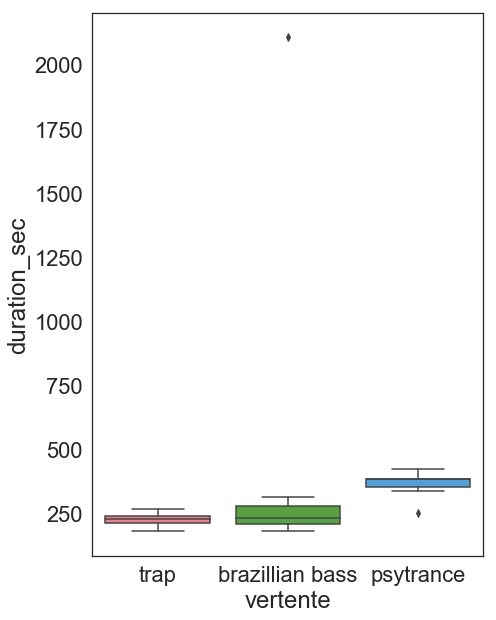

In [9]:
plt.figure(figsize=(7, 10))
ax = sns.boxplot(x="vertente", y="duration_sec", data=df, palette="husl")

In [10]:
df[(df.vertente=='brazillian bass') & (df.duration_sec>2000)]

,vertente,target,nome_original,link_youtube,nome_wav,duration,duration_sec,bpm,pwr_sum,pwr_mean,pwr_std,pwr_cv,pwr_max,pwr_min,db_high
32,brazillian bass,1,SET 🔥 AIMEUBASS SÓ AS MELHORES BRAZILIAN BASS ...,https://www.youtube.com/watch?v=6e99KXody_4,1_set_aimeubass,0.002767,2107.38,123.05,536083.198055,6.106366,1.365183,23.7751,11.416647,0.0,18600.75


### retirando o primeiro outlier, essa musica se tratava de um set em torno de 35 minutos! ai fica complicado analisar muito pesado carregar

In [11]:
df.drop(index=32,inplace=True)
df.reset_index(drop=True,inplace=True)
df

,vertente,target,nome_original,link_youtube,nome_wav,duration,duration_sec,bpm,pwr_sum,pwr_mean,pwr_std,pwr_cv,pwr_max,pwr_min,db_high
0,trap,0,6IX9INE Gotti (WSHH Exclusive - Official Music...,https://www.youtube.com/watch?v=z5WrgDzNIZ0&li...,0_6IX9INE Gotti,0.003100,267.802268,161.50,51058.769531,4.426805,2.274669,51.3840,11.846515,0.000000,12540.0
1,trap,0,Ayo & Teo - Rolex,https://www.youtube.com/watch?v=lwk5OUII9Vc&li...,0_ayo_teo_rolex,0.002800,241.877188,143.55,49260.039062,4.728812,2.284229,48.3045,11.491723,0.000000,20193.0
2,trap,0,Desiigner - Tiimmy Turner (Official Audio),https://www.youtube.com/watch?v=ProbPpO_8oo&li...,0_desiigner_timmy,0.002779,240.147302,143.55,51143.171875,4.944714,1.935868,39.1503,10.960572,0.000000,21323.0
3,trap,0,DRAM - Broccoli,https://www.youtube.com/watch?v=K44j-sb1SRY&li...,0_dram_broccoli,0.002664,230.127891,143.55,45448.003906,4.585612,2.249854,49.0633,10.953014,0.000000,8377.0
4,trap,0,Kendrick Lamar - HUMBLE,https://www.youtube.com/watch?v=tvTRZJ-4EyI&li...,0_kendrick_humble,0.002125,183.618322,152.00,56459.156250,7.139499,2.598188,36.3917,11.390222,0.000000,27781.0
5,trap,0,Lil Uzi Vert - XO TOUR Llif3,https://www.youtube.com/watch?v=Zgmvg-zzctI&li...,0_lil_vert_tour,0.002087,180.355918,152.00,40827.386719,5.255843,2.350178,44.7155,11.696535,0.000000,15589.0
6,trap,0,Mikebøi - Missed,https://www.youtube.com/watch?v=wzMrK-aGCug&li...,0_mike_boi_missed,0.002285,210.144400,23.05,9396.715837,5.100880,1.925158,31.9639,10.748110,0.000000,16363.0
7,trap,0,Post Malone - Psycho,https://www.youtube.com/watch?v=au2n7VVGv_c&li...,0_post_psycho_psycho,0.002738,236.583039,136.00,48928.531250,4.802094,2.018583,42.0355,11.337703,0.000000,13924.0
8,trap,0,21 Savage - Bank Account,https://www.youtube.com/watch?v=sV2t3tW_JTQ&li...,0_savage_account,0.002550,220.317460,152.00,67432.382812,7.106374,2.334411,32.8495,11.408060,0.000000,14451.0
9,trap,0,The Weeknd - Reminder,https://www.youtube.com/watch?v=JZjAg6fK-BQ&li...,0_the_weeknd_reminder,0.002669,230.638730,161.50,46680.007812,4.699487,2.399311,51.0547,11.251370,1.409535,13089.0


### beleza era um outlier, já foi retirado! agora vamos ver o bloxplot de novo

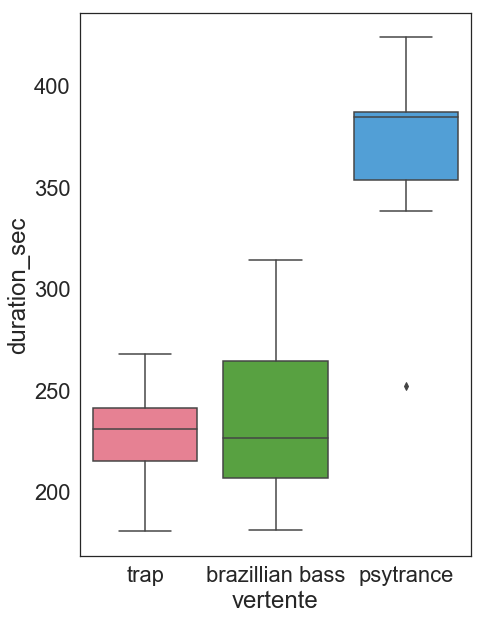

In [12]:
plt.figure(figsize=(7, 10))
ax = sns.boxplot(x="vertente", y="duration_sec", data=df, palette="husl")

### Ixi parece ter mais um outlier no psytrance, bora conferir

In [13]:
df[(df.vertente=='psytrance') & (df.duration_sec<300)]

,vertente,target,nome_original,link_youtube,nome_wav,duration,duration_sec,bpm,pwr_sum,pwr_mean,pwr_std,pwr_cv,pwr_max,pwr_min,db_high
26,psytrance,2,PSY - GANGNAM STYLE,https://www.youtube.com/watch?v=9bZkp7q19f0,2_psy_gangnam_style,0.002919,252.221678,129.2,58591.644531,5.393689,2.220126,41.1616,11.638709,0.0,30768.0


### caraca ta bem errado colocar a musica do coreano como psytrance >.<

In [14]:
df.drop(index=26,inplace=True)
df.reset_index(drop=True,inplace=True)
df

,vertente,target,nome_original,link_youtube,nome_wav,duration,duration_sec,bpm,pwr_sum,pwr_mean,pwr_std,pwr_cv,pwr_max,pwr_min,db_high
0,trap,0,6IX9INE Gotti (WSHH Exclusive - Official Music...,https://www.youtube.com/watch?v=z5WrgDzNIZ0&li...,0_6IX9INE Gotti,0.003100,267.802268,161.50,51058.769531,4.426805,2.274669,51.3840,11.846515,0.000000,12540.0
1,trap,0,Ayo & Teo - Rolex,https://www.youtube.com/watch?v=lwk5OUII9Vc&li...,0_ayo_teo_rolex,0.002800,241.877188,143.55,49260.039062,4.728812,2.284229,48.3045,11.491723,0.000000,20193.0
2,trap,0,Desiigner - Tiimmy Turner (Official Audio),https://www.youtube.com/watch?v=ProbPpO_8oo&li...,0_desiigner_timmy,0.002779,240.147302,143.55,51143.171875,4.944714,1.935868,39.1503,10.960572,0.000000,21323.0
3,trap,0,DRAM - Broccoli,https://www.youtube.com/watch?v=K44j-sb1SRY&li...,0_dram_broccoli,0.002664,230.127891,143.55,45448.003906,4.585612,2.249854,49.0633,10.953014,0.000000,8377.0
4,trap,0,Kendrick Lamar - HUMBLE,https://www.youtube.com/watch?v=tvTRZJ-4EyI&li...,0_kendrick_humble,0.002125,183.618322,152.00,56459.156250,7.139499,2.598188,36.3917,11.390222,0.000000,27781.0
5,trap,0,Lil Uzi Vert - XO TOUR Llif3,https://www.youtube.com/watch?v=Zgmvg-zzctI&li...,0_lil_vert_tour,0.002087,180.355918,152.00,40827.386719,5.255843,2.350178,44.7155,11.696535,0.000000,15589.0
6,trap,0,Mikebøi - Missed,https://www.youtube.com/watch?v=wzMrK-aGCug&li...,0_mike_boi_missed,0.002285,210.144400,23.05,9396.715837,5.100880,1.925158,31.9639,10.748110,0.000000,16363.0
7,trap,0,Post Malone - Psycho,https://www.youtube.com/watch?v=au2n7VVGv_c&li...,0_post_psycho_psycho,0.002738,236.583039,136.00,48928.531250,4.802094,2.018583,42.0355,11.337703,0.000000,13924.0
8,trap,0,21 Savage - Bank Account,https://www.youtube.com/watch?v=sV2t3tW_JTQ&li...,0_savage_account,0.002550,220.317460,152.00,67432.382812,7.106374,2.334411,32.8495,11.408060,0.000000,14451.0
9,trap,0,The Weeknd - Reminder,https://www.youtube.com/watch?v=JZjAg6fK-BQ&li...,0_the_weeknd_reminder,0.002669,230.638730,161.50,46680.007812,4.699487,2.399311,51.0547,11.251370,1.409535,13089.0


### retirado! voltamos pro bloxplot!

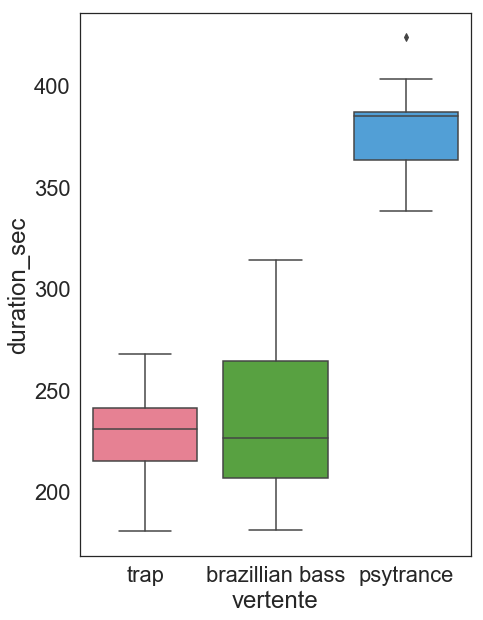

In [15]:
plt.figure(figsize=(7, 10))
ax = sns.boxplot(x="vertente", y="duration_sec", data=df, palette="husl")

### parece que está ok para essa variável.. vamos ver uma outra! o bpm!

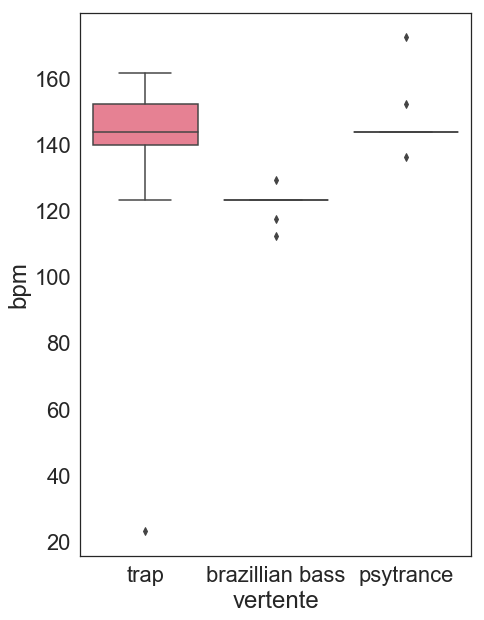

In [16]:
plt.figure(figsize=(7, 10))
ax = sns.boxplot(x="vertente", y="bpm", data=df, palette="husl")

### essa musica aqui ta com bpm muito baixo ue vamos ver

In [17]:
df[(df.vertente=='trap') & (df.bpm<80)]

,vertente,target,nome_original,link_youtube,nome_wav,duration,duration_sec,bpm,pwr_sum,pwr_mean,pwr_std,pwr_cv,pwr_max,pwr_min,db_high
6,trap,0,Mikebøi - Missed,https://www.youtube.com/watch?v=wzMrK-aGCug&li...,0_mike_boi_missed,0.002285,210.1444,23.05,9396.715837,5.10088,1.925158,31.9639,10.74811,0.0,16363.0


### oloko a música tava quebrada começou a tocar e depois ficou no silencio! 

In [18]:
df.drop(index=6,inplace=True)
df.reset_index(drop=True,inplace=True)
df

,vertente,target,nome_original,link_youtube,nome_wav,duration,duration_sec,bpm,pwr_sum,pwr_mean,pwr_std,pwr_cv,pwr_max,pwr_min,db_high
0,trap,0,6IX9INE Gotti (WSHH Exclusive - Official Music...,https://www.youtube.com/watch?v=z5WrgDzNIZ0&li...,0_6IX9INE Gotti,0.003100,267.802268,161.50,51058.769531,4.426805,2.274669,51.3840,11.846515,0.000000,12540.0
1,trap,0,Ayo & Teo - Rolex,https://www.youtube.com/watch?v=lwk5OUII9Vc&li...,0_ayo_teo_rolex,0.002800,241.877188,143.55,49260.039062,4.728812,2.284229,48.3045,11.491723,0.000000,20193.0
2,trap,0,Desiigner - Tiimmy Turner (Official Audio),https://www.youtube.com/watch?v=ProbPpO_8oo&li...,0_desiigner_timmy,0.002779,240.147302,143.55,51143.171875,4.944714,1.935868,39.1503,10.960572,0.000000,21323.0
3,trap,0,DRAM - Broccoli,https://www.youtube.com/watch?v=K44j-sb1SRY&li...,0_dram_broccoli,0.002664,230.127891,143.55,45448.003906,4.585612,2.249854,49.0633,10.953014,0.000000,8377.0
4,trap,0,Kendrick Lamar - HUMBLE,https://www.youtube.com/watch?v=tvTRZJ-4EyI&li...,0_kendrick_humble,0.002125,183.618322,152.00,56459.156250,7.139499,2.598188,36.3917,11.390222,0.000000,27781.0
5,trap,0,Lil Uzi Vert - XO TOUR Llif3,https://www.youtube.com/watch?v=Zgmvg-zzctI&li...,0_lil_vert_tour,0.002087,180.355918,152.00,40827.386719,5.255843,2.350178,44.7155,11.696535,0.000000,15589.0
6,trap,0,Post Malone - Psycho,https://www.youtube.com/watch?v=au2n7VVGv_c&li...,0_post_psycho_psycho,0.002738,236.583039,136.00,48928.531250,4.802094,2.018583,42.0355,11.337703,0.000000,13924.0
7,trap,0,21 Savage - Bank Account,https://www.youtube.com/watch?v=sV2t3tW_JTQ&li...,0_savage_account,0.002550,220.317460,152.00,67432.382812,7.106374,2.334411,32.8495,11.408060,0.000000,14451.0
8,trap,0,The Weeknd - Reminder,https://www.youtube.com/watch?v=JZjAg6fK-BQ&li...,0_the_weeknd_reminder,0.002669,230.638730,161.50,46680.007812,4.699487,2.399311,51.0547,11.251370,1.409535,13089.0
9,trap,0,Ty Dolla $ign - Or Nah,https://www.youtube.com/watch?v=TUj0otkJEBo&li...,0_ty_dolla_or_nah,0.002824,243.989342,123.05,58385.335938,5.556275,2.140186,38.5184,11.079909,1.357278,9847.0


### tem que tomar cuidado pq se a gente so olhasse o tamanho da musica a gente nao ia perceber!

In [19]:
df.vertente.value_counts()

trap               10
brazillian bass    10
psytrance          10
Name: vertente, dtype: int64

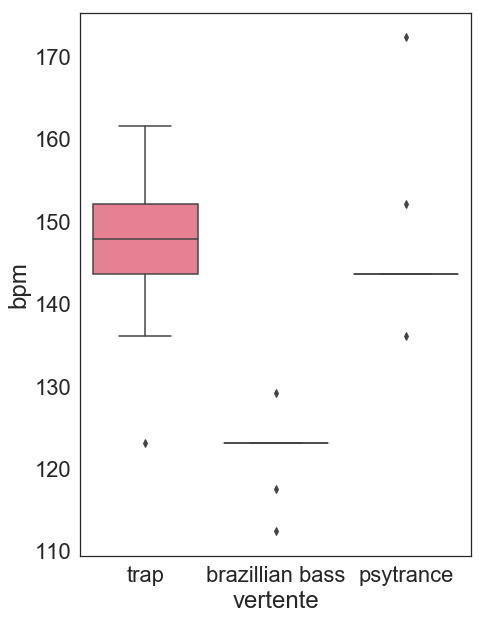

In [20]:
plt.figure(figsize=(7, 10))
ax = sns.boxplot(x="vertente", y="bpm", data=df, palette="husl")

### bom olhando aqui, acho que esses outliers estão ok, dado que parece ter um padrao no bpm do brazillian bass (7 de 10 são iguais) e no psytrance tbm (7 de 10). e eles nem estao muito distantes da média=mediana=1q=3q.

## Analisando os dados

In [22]:
df.head()

,vertente,target,nome_original,link_youtube,nome_wav,duration,duration_sec,bpm,pwr_sum,pwr_mean,pwr_std,pwr_cv,pwr_max,pwr_min,db_high
0,trap,0,6IX9INE Gotti (WSHH Exclusive - Official Music...,https://www.youtube.com/watch?v=z5WrgDzNIZ0&li...,0_6IX9INE Gotti,0.003100,267.802268,161.50,51058.769531,4.426805,2.274669,51.3840,11.846515,0.0,12540.0
1,trap,0,Ayo & Teo - Rolex,https://www.youtube.com/watch?v=lwk5OUII9Vc&li...,0_ayo_teo_rolex,0.002800,241.877188,143.55,49260.039062,4.728812,2.284229,48.3045,11.491723,0.0,20193.0
2,trap,0,Desiigner - Tiimmy Turner (Official Audio),https://www.youtube.com/watch?v=ProbPpO_8oo&li...,0_desiigner_timmy,0.002779,240.147302,143.55,51143.171875,4.944714,1.935868,39.1503,10.960572,0.0,21323.0
3,trap,0,DRAM - Broccoli,https://www.youtube.com/watch?v=K44j-sb1SRY&li...,0_dram_broccoli,0.002664,230.127891,143.55,45448.003906,4.585612,2.249854,49.0633,10.953014,0.0,8377.0
4,trap,0,Kendrick Lamar - HUMBLE,https://www.youtube.com/watch?v=tvTRZJ-4EyI&li...,0_kendrick_humble,0.002125,183.618322,152.00,56459.156250,7.139499,2.598188,36.3917,11.390222,0.0,27781.0


### pair plot

C:\Users\thiag\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


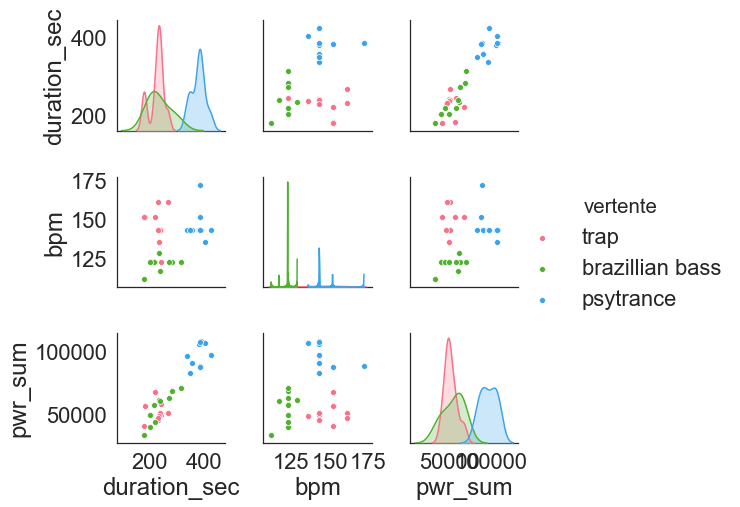

In [41]:
sns.pairplot(df, vars=['duration_sec', 'bpm','pwr_sum'],
                       hue='vertente',palette="husl")

C:\Users\thiag\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


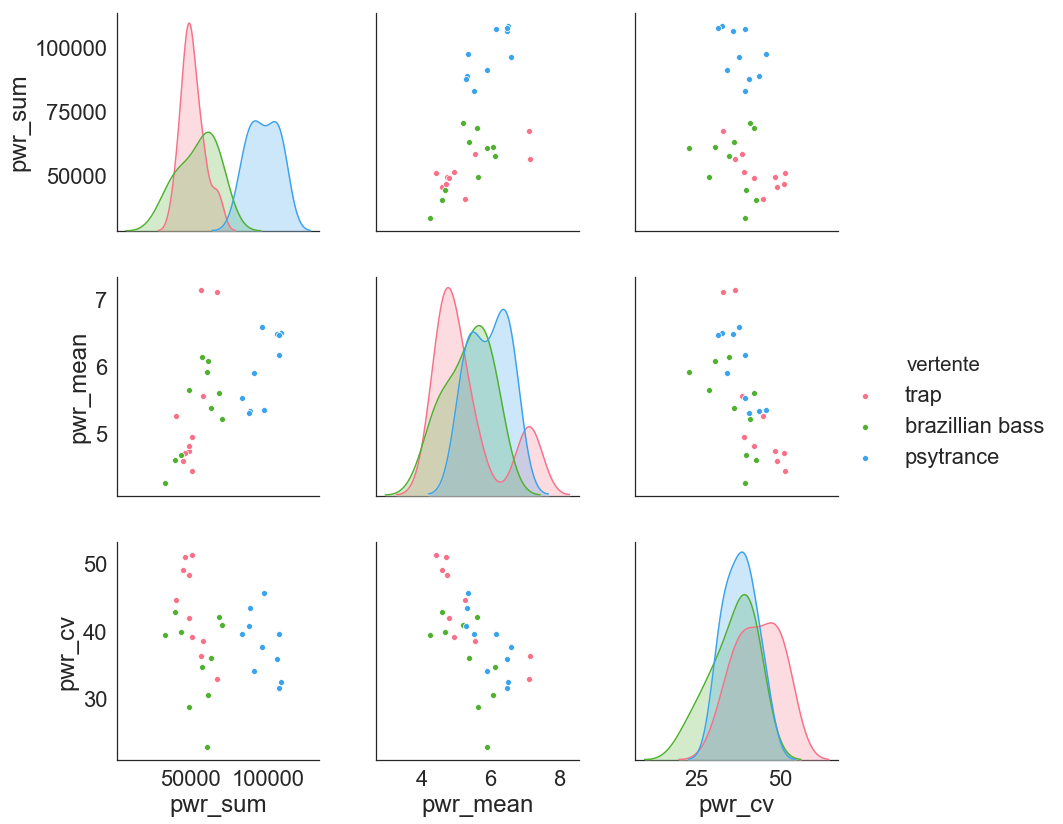

In [40]:
sns.pairplot(df, vars=['pwr_sum','pwr_mean','pwr_cv'],
                       hue='vertente',palette="husl",height=4)

C:\Users\thiag\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


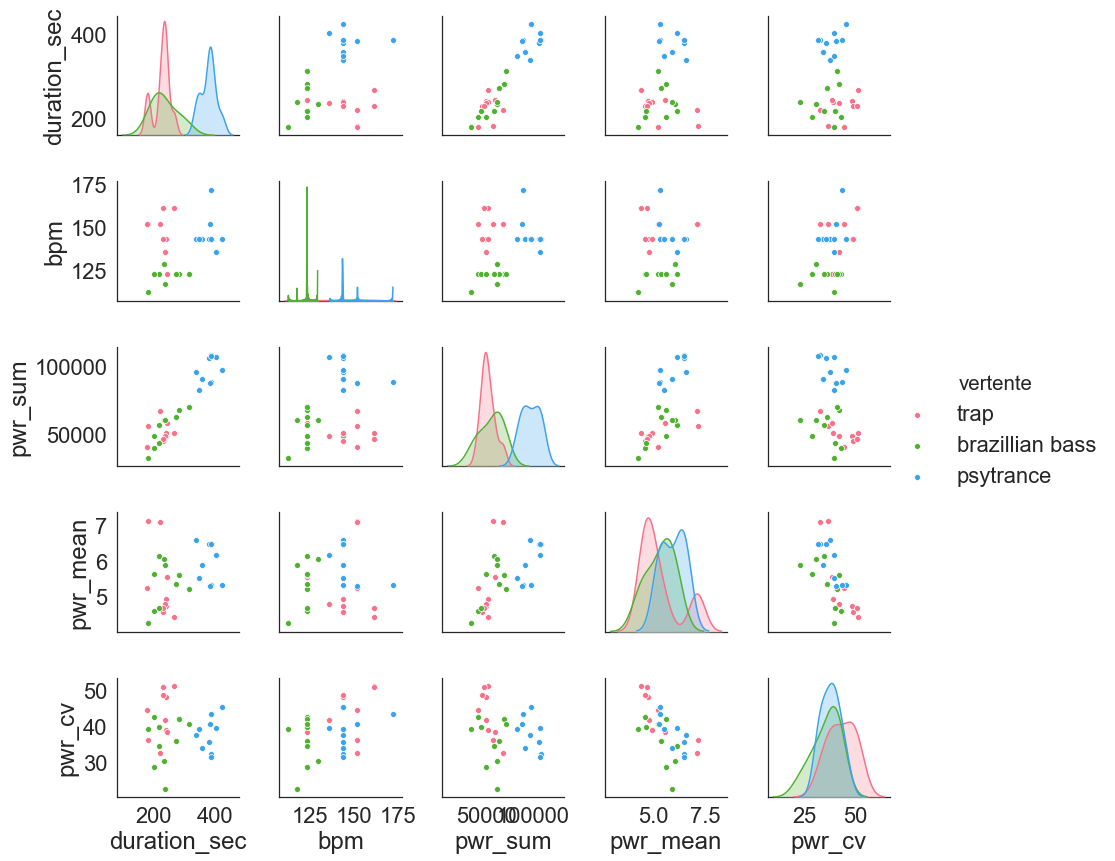

In [44]:
sns.pairplot(df, vars=['duration_sec', 'bpm','pwr_sum','pwr_mean','pwr_cv'],
                       hue='vertente',palette="husl")

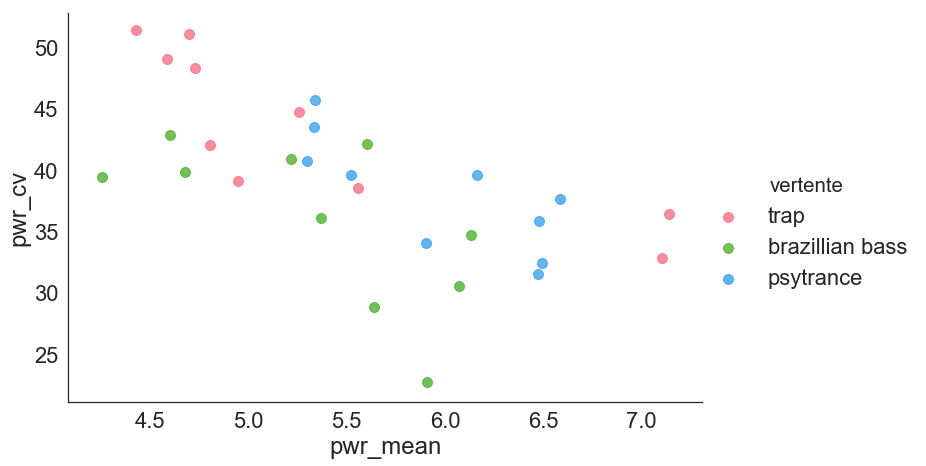

In [49]:

sns.lmplot(x="pwr_mean", y="pwr_cv", hue="vertente",data=df ,fit_reg=False, height=7,aspect=(1.5), scatter_kws={"s": 100},palette="husl",)

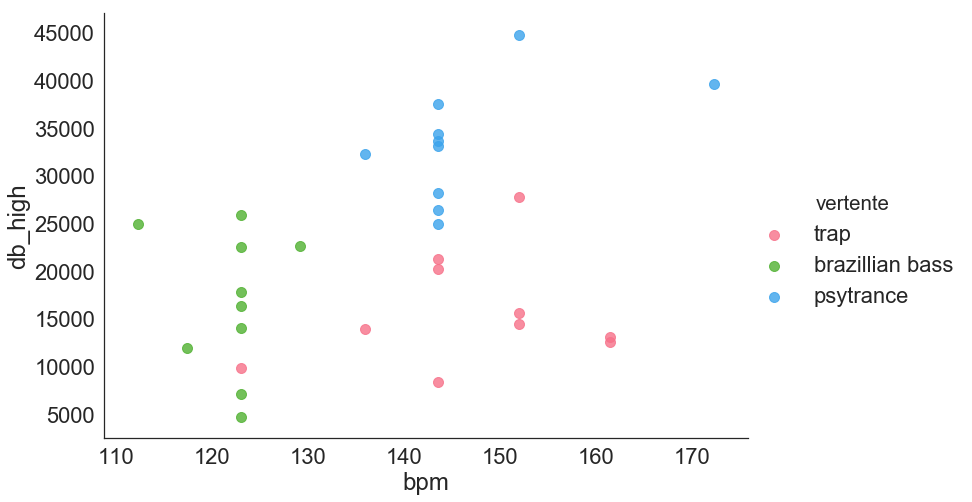

In [278]:

sns.lmplot(x="bpm", y="db_high", hue="vertente",data=df ,fit_reg=False, height=7.5,aspect=(1.5), scatter_kws={"s": 100},palette="husl",)

C:\Users\thiag\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


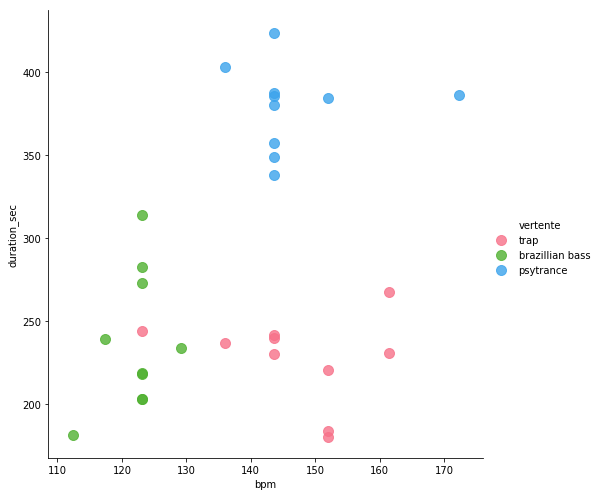

In [69]:
sns.lmplot(x="bpm", y="duration_sec", hue="vertente", data=df,fit_reg=False, size=7,aspect=1, scatter_kws={"s": 100},palette="husl")

## modelagem

### pacotes sklearn

### importando bibliotecas de machine learning

In [70]:
import sklearn
import itertools
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

### funções auxiliares

In [71]:
# Helper to plot confusion matrix -- from Scikit-learn website
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [289]:
# K-Fold helper
def kfold_validate(clf, X, y, k_folds = 10):
    # Constants
    acc, count, cm = [], 0, 0
    kf = StratifiedKFold(n_splits=k_folds, shuffle = True, random_state=4321)
    
    # K-fold split
    for train_idx, test_idx in kf.split(X, y):
        # Count each fold are we validating
        count += 1
        
        # Separe training and test in the Training set for k-Fold
        fold_Xtrain, fold_Xtest = X[train_idx], X[test_idx]
        fold_ytrain, fold_ytest = y[train_idx], y[test_idx]

        # Train
        clf = sklearn.base.clone(clf)
        clf.fit(fold_Xtrain, fold_ytrain)
        pred = clf.predict(fold_Xtest)
        accuracy = accuracy_score(fold_ytest, pred)
        cm += confusion_matrix(fold_ytest, pred)
        acc.append(accuracy)
        print("Fold: %s of % s => accuracy_score = %s" %(count, k_folds, accuracy))
    
    print("\n::Accuracy_score statistics::")
    print("Mean = {0:.5f}".format(np.mean(acc)))
    print("STD = {0:.5f}".format(np.std(acc)))
    return cm


### de-para das vertentes

In [290]:
# Genre dictionary
genres = {'trap': 0, 'brazillian bass': 1, 'psytrance': 2}

### separando as features para testarmos

In [291]:
X=df[['bpm','db_high']].values
y=df.target

Fold: 1 of 10 => accuracy_score = 0.6666666666666666
Fold: 2 of 10 => accuracy_score = 0.6666666666666666
Fold: 3 of 10 => accuracy_score = 0.6666666666666666
Fold: 4 of 10 => accuracy_score = 1.0
Fold: 5 of 10 => accuracy_score = 1.0
Fold: 6 of 10 => accuracy_score = 0.6666666666666666
Fold: 7 of 10 => accuracy_score = 0.6666666666666666
Fold: 8 of 10 => accuracy_score = 0.6666666666666666
Fold: 9 of 10 => accuracy_score = 1.0
Fold: 10 of 10 => accuracy_score = 1.0

::Accuracy_score statistics::
Mean = 0.80000
STD = 0.16330


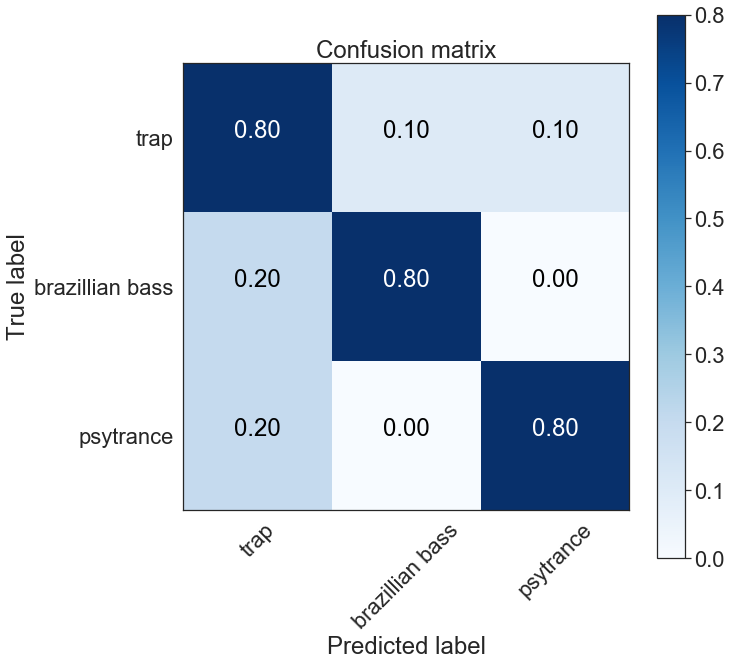

In [292]:
nb = GaussianNB()
cm = kfold_validate(nb, X, y)
nb.fit(X,y)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, genres.keys(), normalize=True)

# regressão logística

Fold: 1 of 10 => accuracy_score = 0.3333333333333333
Fold: 2 of 10 => accuracy_score = 0.6666666666666666
Fold: 3 of 10 => accuracy_score = 0.6666666666666666
Fold: 4 of 10 => accuracy_score = 0.6666666666666666
Fold: 5 of 10 => accuracy_score = 0.6666666666666666
Fold: 6 of 10 => accuracy_score = 0.6666666666666666
Fold: 7 of 10 => accuracy_score = 0.3333333333333333
Fold: 8 of 10 => accuracy_score = 0.6666666666666666
Fold: 9 of 10 => accuracy_score = 0.6666666666666666
Fold: 10 of 10 => accuracy_score = 0.6666666666666666

::Accuracy_score statistics::
Mean = 0.60000
STD = 0.13333


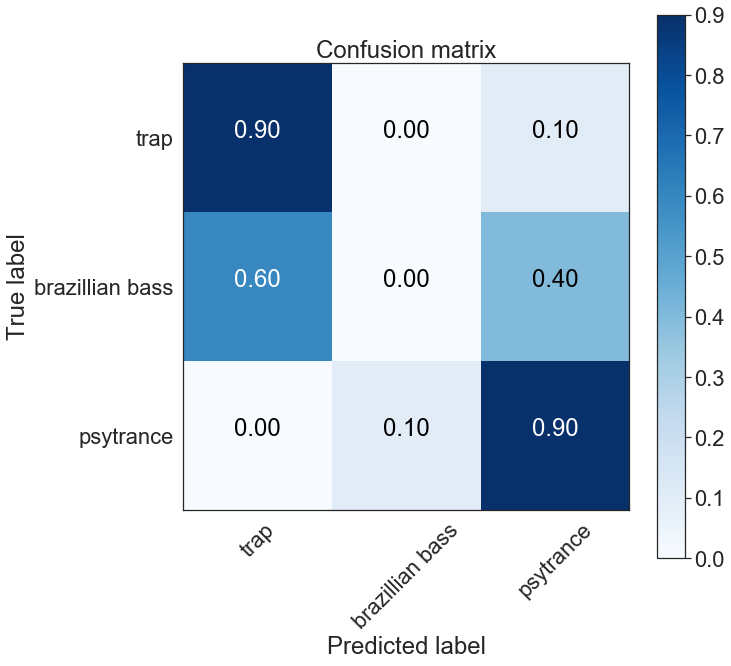

In [293]:
lr = LogisticRegression()
cm = kfold_validate(lr, X, y)
lr.fit(X,y)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, genres.keys(), normalize=True)

### LDA

Fold: 1 of 10 => accuracy_score = 1.0
Fold: 2 of 10 => accuracy_score = 1.0
Fold: 3 of 10 => accuracy_score = 1.0
Fold: 4 of 10 => accuracy_score = 1.0
Fold: 5 of 10 => accuracy_score = 1.0
Fold: 6 of 10 => accuracy_score = 1.0
Fold: 7 of 10 => accuracy_score = 0.6666666666666666
Fold: 8 of 10 => accuracy_score = 0.6666666666666666
Fold: 9 of 10 => accuracy_score = 1.0
Fold: 10 of 10 => accuracy_score = 1.0

::Accuracy_score statistics::
Mean = 0.93333
STD = 0.13333


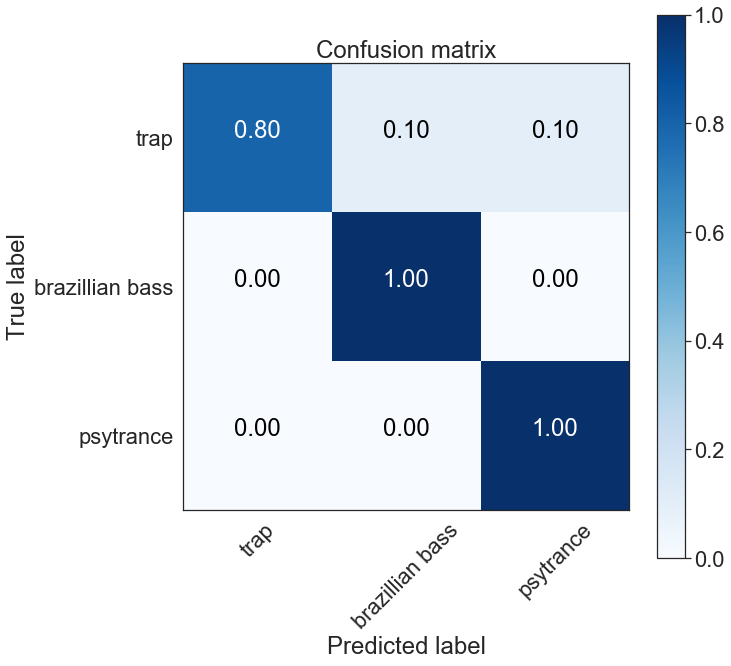

In [294]:
lda =  LinearDiscriminantAnalysis()
cm = kfold_validate(lda, X, y)
lda.fit(X,y)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, genres.keys(), normalize=True)

### Decision tree (max_depth=2)

Fold: 1 of 10 => accuracy_score = 0.6666666666666666
Fold: 2 of 10 => accuracy_score = 1.0
Fold: 3 of 10 => accuracy_score = 1.0
Fold: 4 of 10 => accuracy_score = 0.6666666666666666
Fold: 5 of 10 => accuracy_score = 1.0
Fold: 6 of 10 => accuracy_score = 1.0
Fold: 7 of 10 => accuracy_score = 0.6666666666666666
Fold: 8 of 10 => accuracy_score = 0.6666666666666666
Fold: 9 of 10 => accuracy_score = 0.6666666666666666
Fold: 10 of 10 => accuracy_score = 1.0

::Accuracy_score statistics::
Mean = 0.83333
STD = 0.16667


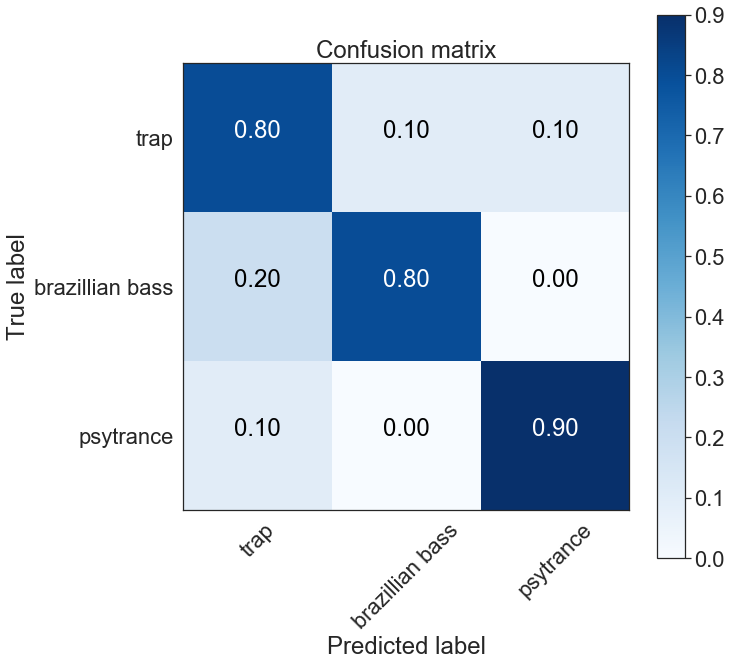

In [295]:
dt2 = DecisionTreeClassifier(max_depth=2)
cm = kfold_validate(dt2, X, y)
dt2.fit(X,y)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, genres.keys(), normalize=True)

### Decision tree (overfit)

Fold: 1 of 10 => accuracy_score = 0.6666666666666666
Fold: 2 of 10 => accuracy_score = 0.6666666666666666
Fold: 3 of 10 => accuracy_score = 0.6666666666666666
Fold: 4 of 10 => accuracy_score = 1.0
Fold: 5 of 10 => accuracy_score = 1.0
Fold: 6 of 10 => accuracy_score = 1.0
Fold: 7 of 10 => accuracy_score = 0.6666666666666666
Fold: 8 of 10 => accuracy_score = 0.6666666666666666
Fold: 9 of 10 => accuracy_score = 1.0
Fold: 10 of 10 => accuracy_score = 1.0

::Accuracy_score statistics::
Mean = 0.83333
STD = 0.16667


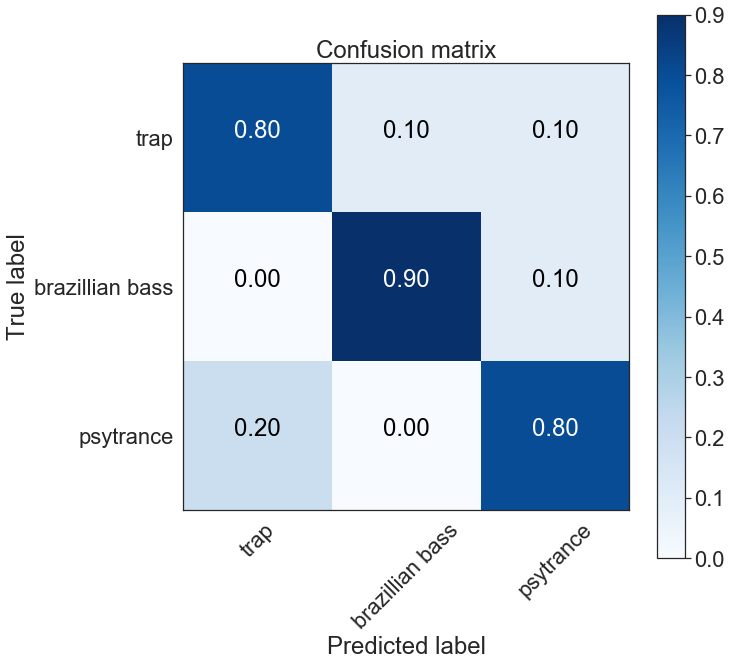

In [296]:
dt3 = DecisionTreeClassifier(max_depth=10)
cm = kfold_validate(dt3, X, y)
dt3.fit(X,y)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, genres.keys(), normalize=True)

### QDA

Fold: 1 of 10 => accuracy_score = 0.6666666666666666
Fold: 2 of 10 => accuracy_score = 0.6666666666666666
Fold: 3 of 10 => accuracy_score = 0.6666666666666666
Fold: 4 of 10 => accuracy_score = 1.0
Fold: 5 of 10 => accuracy_score = 1.0
Fold: 6 of 10 => accuracy_score = 0.6666666666666666
Fold: 7 of 10 => accuracy_score = 0.6666666666666666
Fold: 8 of 10 => accuracy_score = 0.6666666666666666
Fold: 9 of 10 => accuracy_score = 1.0
Fold: 10 of 10 => accuracy_score = 1.0

::Accuracy_score statistics::
Mean = 0.80000
STD = 0.16330


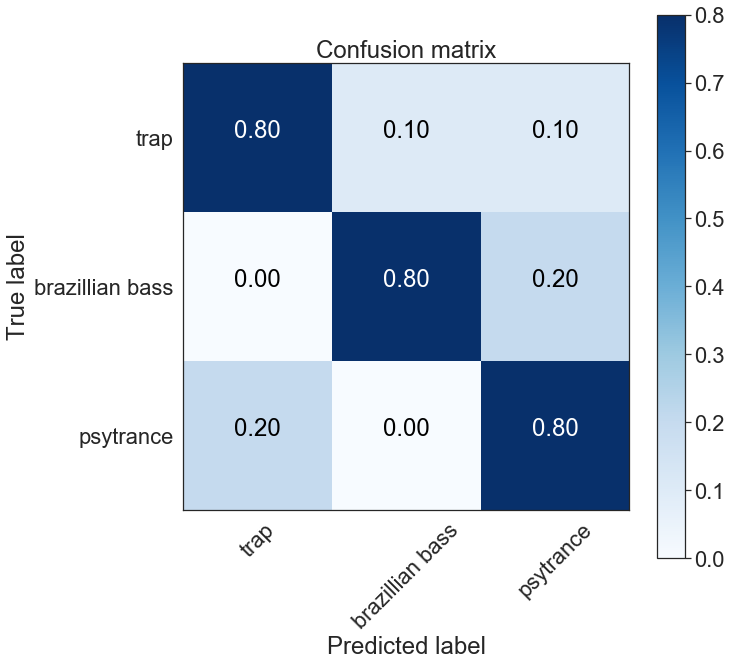

In [297]:
qda =  QuadraticDiscriminantAnalysis()
cm = kfold_validate(qda, X, y)
qda.fit(X,y)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, genres.keys(), normalize=True)

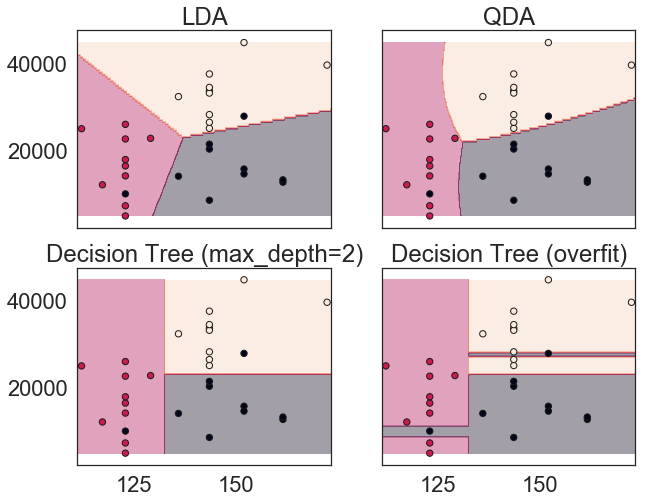

In [298]:
from itertools import product

# Plotting decision regions

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 500))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [lda,qda,dt2,dt3],
                        ['LDA',
                         'QDA',
                         'Decision Tree (max_depth=2)',
                        'Decision Tree (overfit)']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()